In [17]:
import json
import ast

import numpy as np
import matplotlib.pyplot as plt

from notebooks.utils import outdir, dirs

In [3]:
task = 1
sampler = 'AvgImportance'

In [4]:
log_file = dirs(outdir / f'task{task}/{sampler}')[-1] / 'log.txt'

In [18]:
strs = re.findall(r'example counts.*(\[.*\])', log_file.read_text())
dists = [*map(json.loads, strs)]


In [31]:
lcm = np.lcm.reduce([*map(len, dists)])
full = np.array([np.repeat(dist, lcm/len(dist)) for dist in dists], dtype=float)
full /= full.sum(axis=1, keepdims=True)

In [50]:
def plot_dist(task, sampler):
	log_file = dirs(outdir / f'task{task}/{sampler}')[-1] / 'log.txt'
	strs = re.findall(r'example counts.*(\[.*\])', log_file.read_text())
	dists = [*map(json.loads, strs)]
	lcm = np.lcm.reduce([*map(len, dists)])
	full = np.array([np.repeat(dist, lcm/len(dist)) for dist in dists], dtype=float)
	full /= full.sum(axis=1, keepdims=True)
	dist = full.sum(axis=0)*full.shape[1]/full.sum()
	return plt.step(np.linspace(0, 1, full.shape[1]), dist)

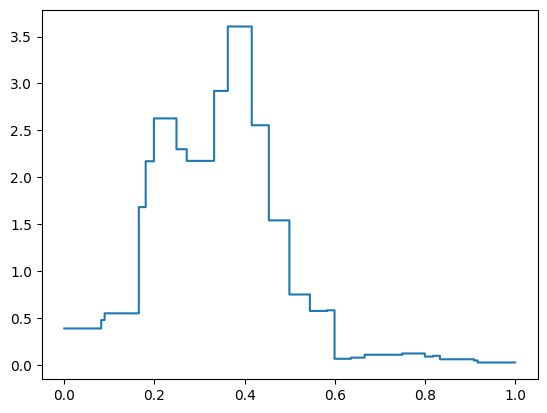

In [52]:
plot_dist(1, 'AvgImportance')

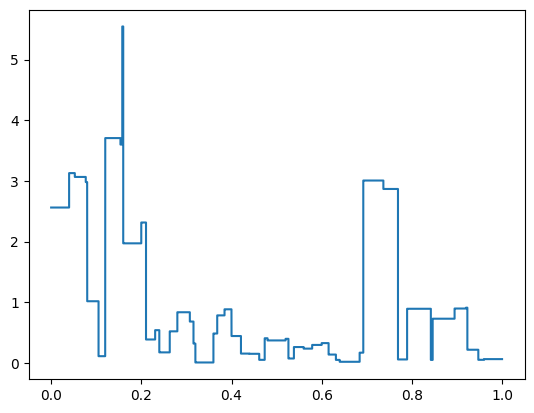

In [53]:
plot_dist(2, 'AvgImportance')

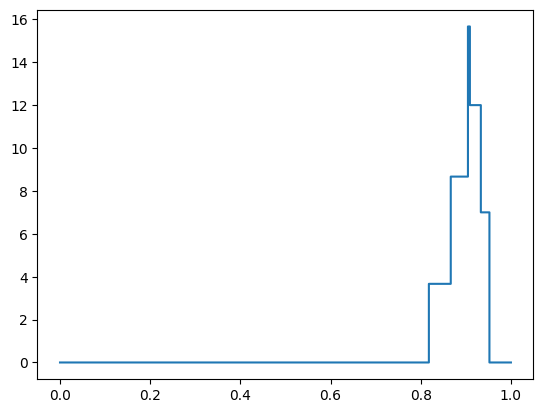

In [54]:
plot_dist(4, 'AvgImportance')

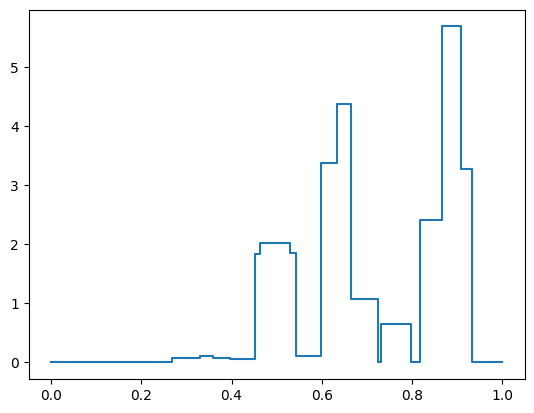

In [55]:
plot_dist(5, 'AvgImportance')

In [57]:
log_file = dirs(outdir / f'task4/AvgImportance')[-1] / 'log.txt'
strs = re.findall(r'example counts.*(\[.*\])', log_file.read_text())
dists = [*map(json.loads, strs)]
np.unique([d[-2] for d in dists])

array([3000])

In [58]:
import tensorflow as tf
m = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

2023-01-08 23:56:03.151221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-08 23:56:09.112928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


553467096/553467096 [==============================] - 16s 0us/step


In [61]:
[np.prod(l.output.shape[1:]) for l in m.layers]

[150528,
 3211264,
 3211264,
 802816,
 1605632,
 1605632,
 401408,
 802816,
 802816,
 802816,
 200704,
 401408,
 401408,
 401408,
 100352,
 100352,
 100352,
 100352,
 25088,
 25088,
 4096,
 4096,
 1000]